<a href="https://colab.research.google.com/github/Projects-Analysis/Store-Performance-Analysis-using-Python/blob/main/Store_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Store Performance Analysis using Python

### Introduction

In the world of retail, data holds the keys to understanding customer behavior, optimizing operations, and driving growth. This article dives into a comprehensive analysis of a store's performance, leveraging Python's powerful tools to extract valuable insights and uncover opportunities for improvement.

# Importing the Python Libraries and the Dataset

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.colors as colors
pio.templates.default = "plotly_white"
import warnings
warnings.filterwarnings('ignore')


In [ ]:
data = pd.read_csv("/content/Superstore.csv" , encoding='latin-1')

In [ ]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


# Let's discover the fundamental columns, understand their significance and grasp the types of data they hold.

- Order ID: A unique identifier for each order placed.

- Order Date: The date when the order was placed.

- Ship Date: The date when the ordered items were shipped.

- Ship Mode: The shipping mode chosen for the order (e.g., Second Class).

- Customer ID: A unique identifier for each customer.
- Customer Name: The name of the customer placing the order.

- Segment: The market segment to which the customer belongs (e.g., Consumer, Corporate)

- Country: The country where the order was placed (e.g., United States).

- City: The city where the order was placed.

- State: The state within the country where the order was placed.

- Postal Code: The postal code associated with the order location.

- Region: The region of the country where the order was placed (e.g., South, West).

- Product ID: A unique identifier for each product.

- Category: The broad category to which the product belongs (e.g., Furniture, Office Supplies).
- Sub-Category: The specific sub-category to which the product belongs (e.g., Bookcases, Chairs)

- Product Name: The name of the product ordered.

- Sales: The sales amount associated with the order.

In [ ]:
data.shape

(9994, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

# Converting Date Columns to Datetime and Extracting Date Components

In [ ]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

data['Order Year'] = data['Order Date'].dt.year
data['Order Month'] = data['Order Date'].dt.month
data['Order Day of Week'] = data['Order Date'].dt.dayofweek

In [ ]:
data.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Order Year,Order Month,Order Day of Week
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896,2015.722233,7.809686,3.206324
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108,1.123555,3.284654,2.122925
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000,2014.000000,1.000000,0.000000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750,2015.000000,5.000000,1.000000
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500,2016.000000,9.000000,4.000000
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000,2017.000000,11.000000,5.000000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000,2017.000000,12.000000,6.000000


# Grouping Data by City and Calculating the Sum of Sales

In [ ]:
city_info = data.groupby("City").sum().reset_index()

# Generating Chart for Top 10 Cities by Sales


In [ ]:
city_info[['City' ,'Sales']].sort_values(by = ["Sales"] ,ascending = False).head(10)

,City,Sales
329,New York City,256368.1610
266,Los Angeles,175851.3410
452,Seattle,119540.7420
438,San Francisco,112669.0920
374,Philadelphia,109077.0130
207,Houston,64504.7604
80,Chicago,48539.5410
437,San Diego,47521.0290
216,Jacksonville,44713.1830
464,Springfield,43054.3420


# Displaying the Top 10 Cities by Sales

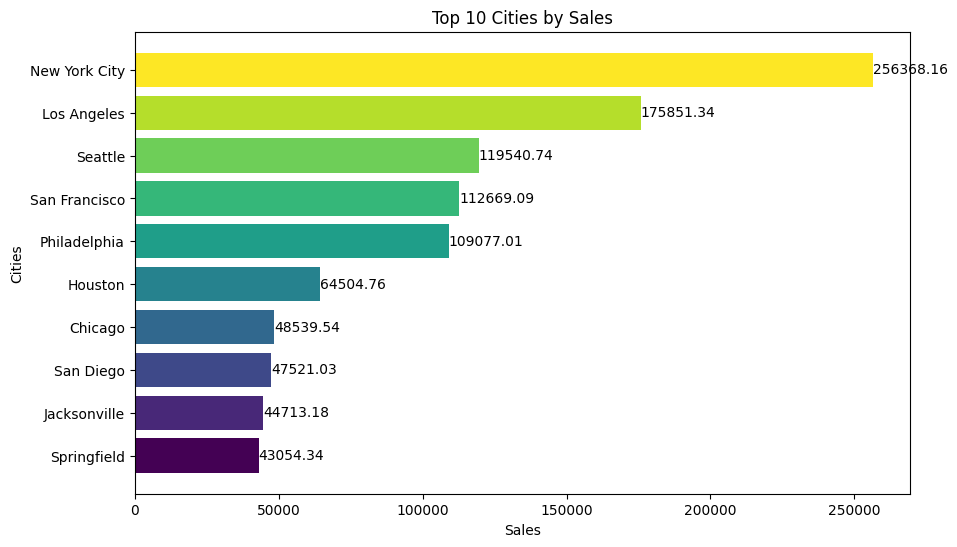

In [ ]:
top_cities = city_info[['City', 'Sales']].sort_values(by='Sales', ascending=True).tail(10)

colors = plt.cm.viridis(np.linspace(0, 1, len(top_cities)))

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_cities['City'], top_cities['Sales'], color=colors)
ax.set_xlabel('Sales')
ax.set_ylabel('Cities')
ax.set_title('Top 10 Cities by Sales')

for i, (value, city) in enumerate(zip(top_cities['Sales'], top_cities['City'])):
    ax.text(value, i, f'{value:.2f}', ha='left', va='center')

plt.show()

# Grouping and Sorting Product Sales Data

In [ ]:
products_info = data.groupby(['Product Name']).sum().reset_index()

In [ ]:
Sales_info = products_info[["Product Name", "Sales"]].sort_values(by=['Sales'], ascending = False)
Sales_info.head(10)

,Product Name,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.824
650,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.384
444,Cisco TelePresence System EX90 Videoconferenci...,22638.480
786,HON 5400 Series Task Chairs for Big and Tall,21870.576
686,GBC DocuBind TL300 Electric Binding System,19823.479
688,GBC Ibimaster 500 Manual ProClick Binding System,19024.500
805,Hewlett Packard LaserJet 3310 Copier,18839.686
787,HP Designjet T520 Inkjet Large Format Printer ...,18374.895
683,GBC DocuBind P400 Electric Binding System,17965.068
813,High Speed Automatic Electric Letter Opener,17030.312


# Displaying the Top 10 Products by Sales

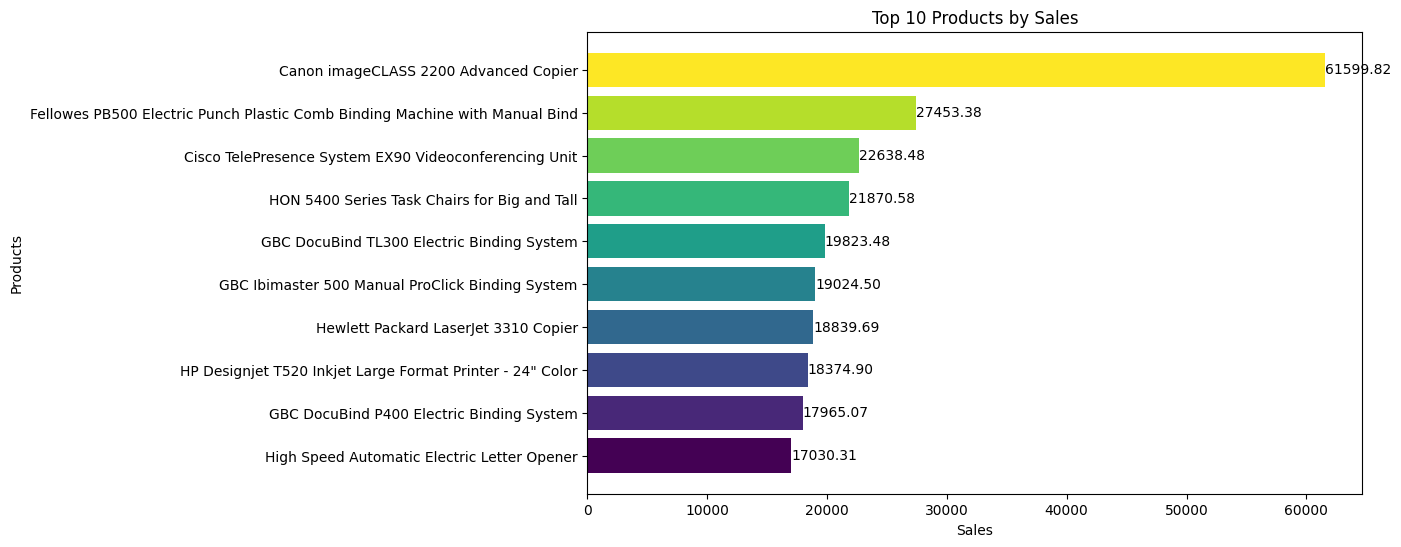

In [ ]:
top_products = Sales_info.sort_values(by='Sales', ascending=True).tail(10)

colors = plt.cm.viridis(np.linspace(0, 1, len(top_products)))

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top_products['Product Name'], top_products['Sales'], color=colors)
ax.set_xlabel('Sales')
ax.set_ylabel('Products')
ax.set_title('Top 10 Products by Sales')

for i, (value, name) in enumerate(zip(top_products['Sales'], top_products['Product Name'])):
    ax.text(value, i, f'{value:.2f}', ha='left', va='center')

plt.show()

# Analyzing the Sales by Product Category

In [ ]:
sales_by_category = data.groupby('Category')['Sales'].sum().reset_index()

fig = px.pie(sales_by_category,
             values='Sales',
             names='Category',
             hole=0.5,
             color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(title_text='Sales Analysis by Category', title_font=dict(size=24))

fig.show()

# Sales and Profit Analysis by Segment

In [ ]:
segment_analysis = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

color_palette = colors.qualitative.Pastel

fig = go.Figure()
fig.add_trace(go.Bar(x=segment_analysis['Segment'],
                     y=segment_analysis['Sales'],
                     name='Sales',
                     marker_color=color_palette[0]))
fig.add_trace(go.Bar(x=segment_analysis['Segment'],
                     y=segment_analysis['Profit'],
                     name='Profit',
                     marker_color=color_palette[1]))

fig.update_layout(title='Sales and Profit Analysis by Customer Segment',
                  xaxis_title='Customer Segment', yaxis_title='Amount')

fig.show()

# Yearly Sales and Profit Analysis

In [ ]:
yearly_data = data.groupby(['Order Date'], as_index=False).sum()[['Order Date' , 'Sales' , 'Profit']]
yearly_data = yearly_data.set_index('Order Date')

yearly_data = yearly_data.resample('Y').sum()
yearly_data.reset_index(inplace=True)

yearly_data["Order Date"] = [str(k.year) for k in yearly_data['Order Date'] ]
yearly_data.rename(columns = {"Order Date":'Year'}, inplace = True)
yearly_data = yearly_data.set_index('Year')


yearly_data

,Sales,Profit
Year,,
2014,484247.4981,49543.9741
2015,470532.5090,61618.6037
2016,609205.5980,81795.1743
2017,733215.2552,93439.2696


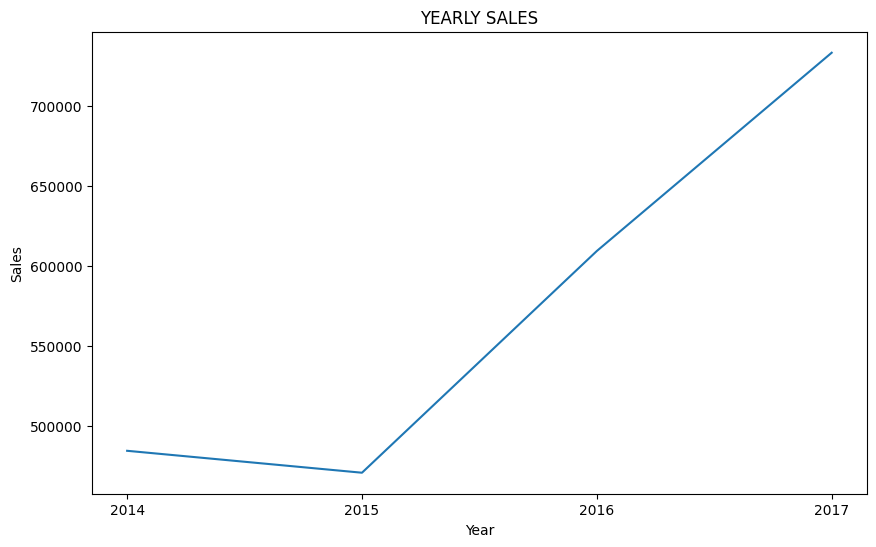

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(yearly_data['Sales'])
plt.xlabel("Year")
plt.ylabel("Sales")
plt.title("YEARLY SALES")
plt.show()

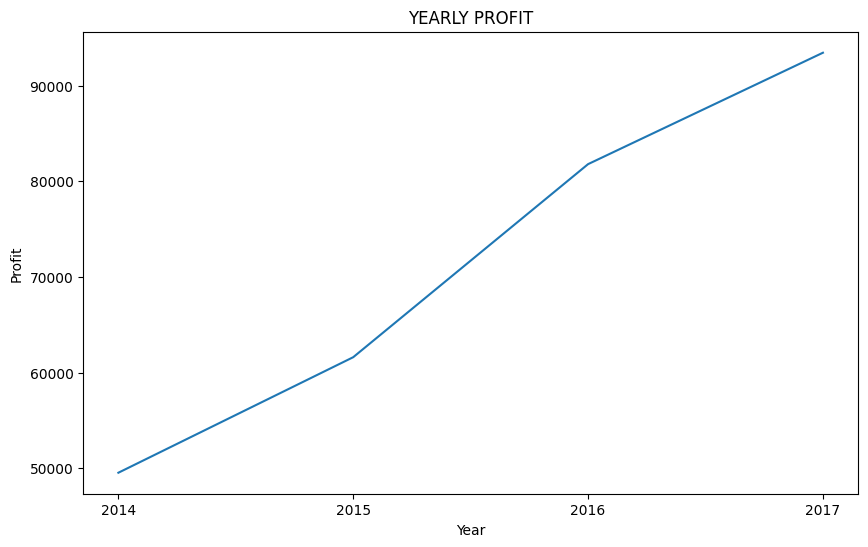

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(yearly_data['Profit'])
plt.xlabel("Year")
plt.ylabel("Profit")
plt.title("YEARLY PROFIT")
plt.show()

# Sub - Category Analysis by Profit and Sales

In [ ]:
subcategory_sales = data.groupby('Sub-Category')['Sales'].sum().reset_index()
fig = px.bar(subcategory_sales,
             x='Sub-Category',
             y='Sales',
             title='Sales Analysis by Sub-Category')
fig.show()

In [ ]:
subcategory_profit = data.groupby('Sub-Category')['Profit'].sum().reset_index()
fig = px.bar(subcategory_profit, x='Sub-Category',
             y='Profit',
             title='Profit Analysis by Sub-Category')
fig.show()

## Key Findings

- Top Cities: New York City, Los Angeles, and Seattle emerged as the top three cities by sales, indicating strong market presence and potential for further expansion.

- "Canon imageCLASS LBP6030w" and "ThinkPad X1 Carbon" reigned as the highest-selling products suggesting customer preferences and potential opportunities for targeted marketing.

- Technology dominated sales contributing over 60% of total revenue followed by furniture and office supplies, highlighting a clear focus and potential for diversification.


- The Consumer segment generated the highest sales but yielded lower profit margins compared to the Corporate segment. This presents an opportunity to explore strategies for boosting profitability within the Consumer segment.


- Sales and profit exhibited a consistent upward trend over the years, demonstrating positive growth. However, a slight dip in profit in 2014 warrants further investigation to identify contributing factors.


- Copiers and Phones stood out as the most profitable sub-categories while Binders and Machines incurred losses suggesting a need for re-evaluation of pricing or promotional strategies.


### Recommendations
- Prioritize marketing efforts and resource allocation in top-performing cities to maximize returns.
-  Reassess the product portfolio, potentially adjusting prices or promotions to boost sales of less profitable items.
- Develop targeted marketing and pricing strategies tailored to the distinct needs and preferences of each customer segment.
- Conduct deeper analysis to uncover factors influencing profitability within sub-categories, informing strategic adjustments.
- Continuously track sales and profit trends over time to identify seasonal patterns or potential issues enabling proactive measures.

### Conclusion
This comprehensive analysis has unearthed valuable insights into the store's performance, shedding light on sales patterns, customer preferences, and areas for improvement. By acting upon these recommendations, the store can strategically align its operations, enhance customer experiences, and ultimately drive greater profitability and growth. Data-driven decision-making empowers retailers to navigate the ever-evolving landscape of commerce and achieve sustained success.